In [1]:
from google.colab import files

# Importer les fichiers
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd

# Charger les fichiers CSV dans des DataFrames
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Vérifier les valeurs manquantes
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Remplir les valeurs manquantes pour l'âge par la médiane
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Supprimer la colonne 'Cabin' cause trop de valeurs manquantes
train_df.drop(columns=['Cabin'], inplace=True)

# Remplir les valeurs manquantes pour 'Embarked' par la mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

<ipython-input-7-350bf2ba11c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-7-350bf2ba11c6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [8]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


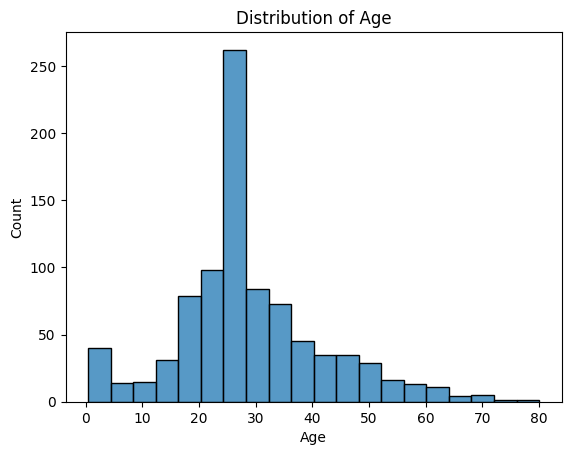

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df['Age'], bins=20, kde=False)
plt.title('Distribution of Age')
plt.show()


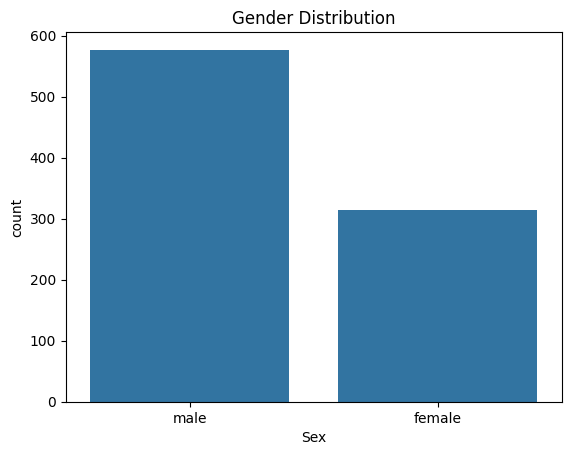

In [12]:
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')
plt.show()

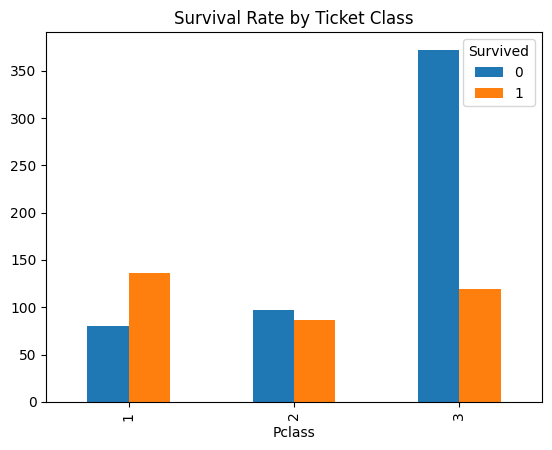

In [13]:
#Influence de Classe sur la survie
pd.crosstab(train_df['Pclass'], train_df['Survived']).plot(kind='bar')
plt.title('Survival Rate by Ticket Class')
plt.show()

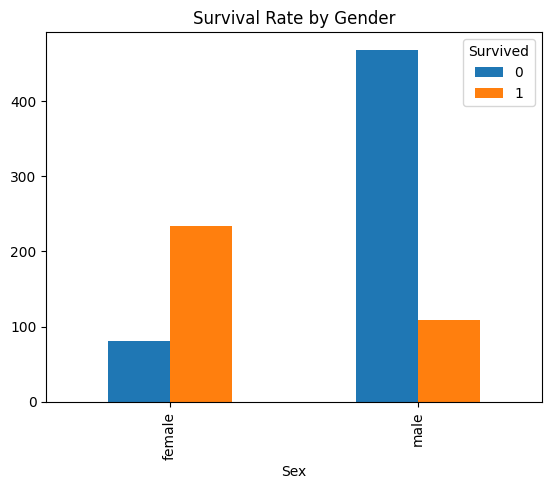

In [14]:
#Influence du sexe sur la survie
pd.crosstab(train_df['Sex'], train_df['Survived']).plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.show()


In [17]:
import numpy as np

# Créer des tranches d'âge
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                              labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

<ipython-input-18-60d0230bce2b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=train_df, ci=None)


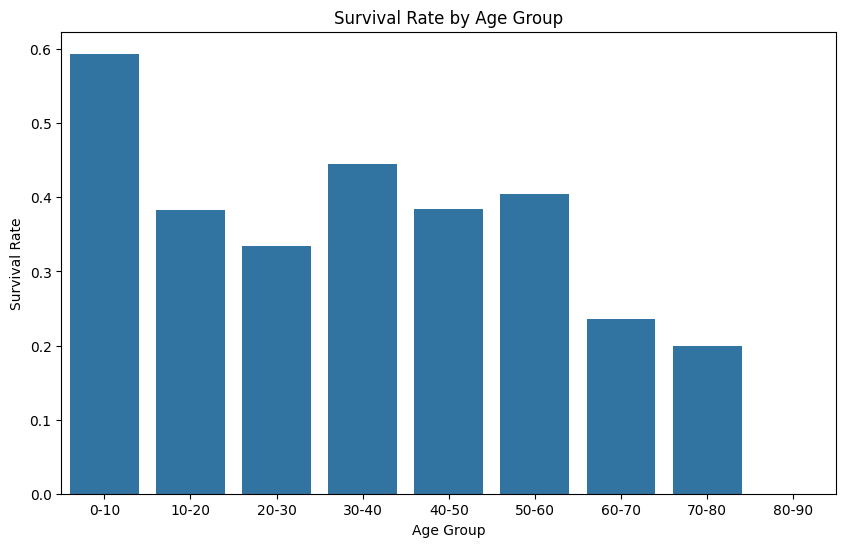

In [18]:
# Créer un barplot pour montrer le taux de survie dans chaque tranche d'âge
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_df, ci=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

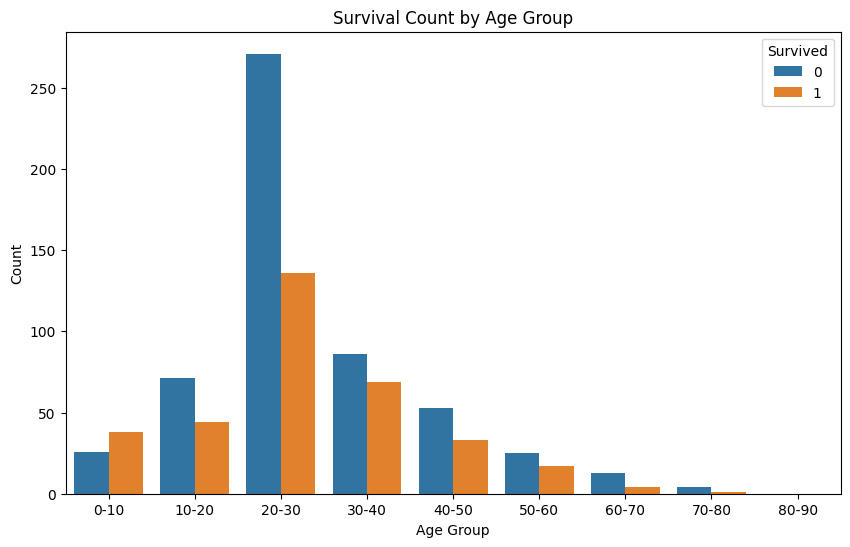

In [19]:
# Countplot pour afficher les survivants et non-survivants par tranche d'âge
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=train_df)
plt.title('Survival Count by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.show()

In [20]:
# Conversion de la colonne Sex en numérique : 0 pour Female, 1 pour Male
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})

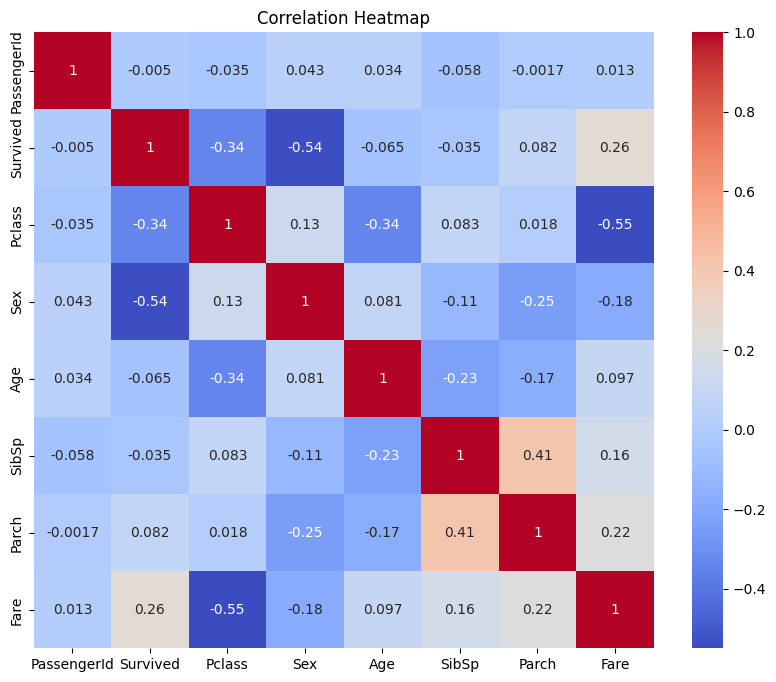

In [21]:
# Sélectionner uniquement les colonnes numériques
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Afficher la heatmap des corrélations pour les colonnes numériques
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()